In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
# License: MIT

In [3]:
%matplotlib inline

## Packages

In [4]:
import numpy as np
import scipy as scipy
import scipy.stats as stats
import scipy.linalg as linalg
from pprint import pprint

import matplotlib.gridspec as gridspec
import matplotlib.path as mpath
import matplotlib.pyplot as plt

import sys
import os
import copy
import string
import glob
import xarray as xr 

import warnings

## Modules

In [5]:
from custom_functions import MyIVP

# Assignment 5 Question 2b-c

## Define the system

In [6]:
f = lambda t,x,p :np.array([(1-x[0,:]**2/3)*x[0,:]-x[1,:],
    p[1,:]*(x[0,:]+p[0,:])])

alpha=0.9

## Varying $\epsilon$

In [7]:
ps=np.array([[alpha,alpha,alpha],[1,0.1,0.01]])

# Caluclate the slow manifold
v_slow = np.linspace(-2,2,100)
w = v_slow-v_slow**3/3

# Simulate behaviour
tspan = [0,1000]
h = 1e-3
x0s = np.array([[-0.1,-0.1,-0.1],[0.1,0.1,0.1]])

xout,t,xend = MyIVP(lambda t,x:f(t,x,ps),x0s,tspan,h)

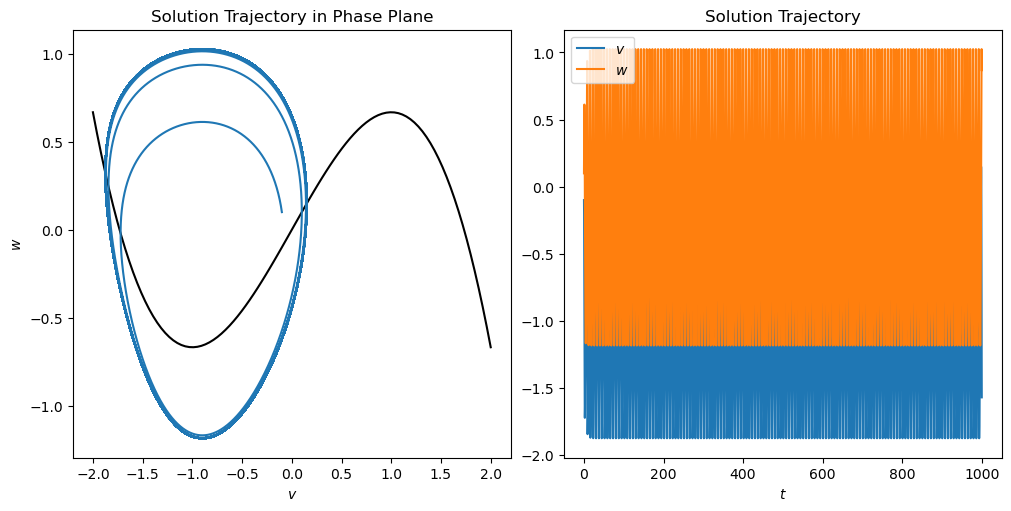

In [8]:
fig, axs = plt.subplots(1, 2, layout='constrained', figsize=(10, 5))

ax1 = axs[0]
ax1.plot(v_slow,w,'k')
ax1.plot(xout[0,0,:],xout[1,0,:])
ax1.set_xlabel("$v$")
ax1.set_ylabel("$w$")
ax1.set_title("Solution Trajectory in Phase Plane")

ax2 = axs[1] 
ax2.plot(t,xout[:,0,:].T)
ax2.set_xlabel("$t$")
ax2.legend(['$v$','$w$'])
ax2.set_title("Solution Trajectory")

plt.show()

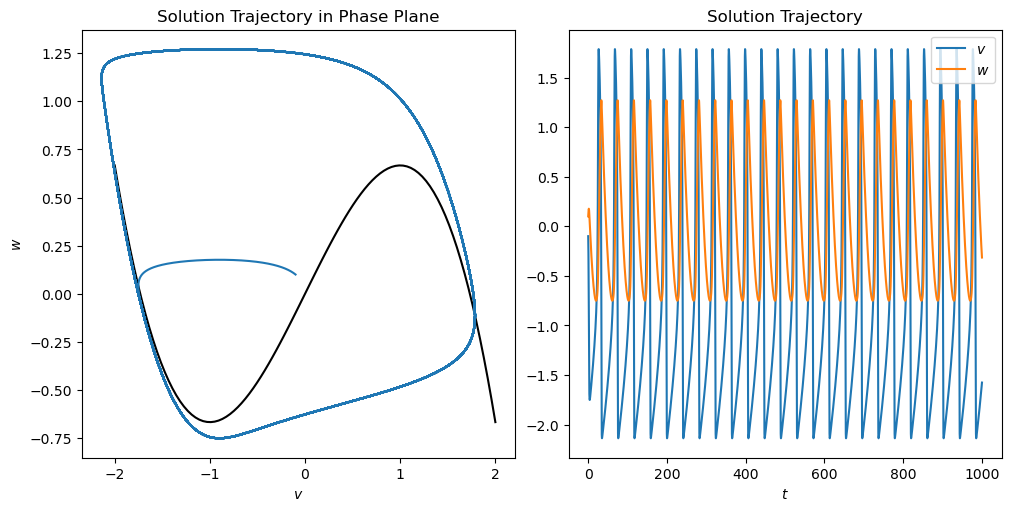

In [9]:
fig, axs = plt.subplots(1, 2, layout='constrained', figsize=(10, 5))

ax1 = axs[0]
ax1.plot(v_slow,w,'k')
ax1.plot(xout[0,1,:],xout[1,1,:])
ax1.set_xlabel("$v$")
ax1.set_ylabel("$w$")
ax1.set_title("Solution Trajectory in Phase Plane")

ax2 = axs[1] 
ax2.plot(t,xout[:,1,:].T)
ax2.set_xlabel("$t$")
ax2.legend(['$v$','$w$'])
ax2.set_title("Solution Trajectory")

plt.show()

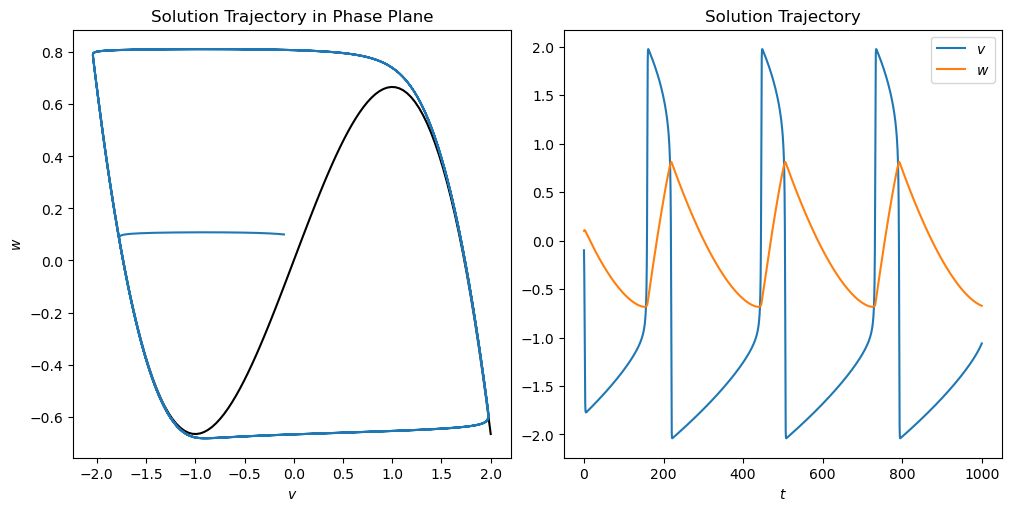

In [10]:
fig, axs = plt.subplots(1, 2, layout='constrained', figsize=(10, 5))

ax1 = axs[0]
ax1.plot(v_slow,w,'k')
ax1.plot(xout[0,2,:],xout[1,2,:])
ax1.set_xlabel("$v$")
ax1.set_ylabel("$w$")
ax1.set_title("Solution Trajectory in Phase Plane")

ax2 = axs[1] 
ax2.plot(t,xout[:,2,:].T)
ax2.set_xlabel("$t$")
ax2.legend(['$v$','$w$'])
ax2.set_title("Solution Trajectory")

plt.show()

## Interpretation
As epsilon is decreased, the system spends more time along the slow manifold and quickly transitions through phse space when the slow manifold has a turning point. The behaviour is a relaxation oscillation occurring on two different timescales.